<a href="https://colab.research.google.com/github/xhxuciedu/CS284A/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def set_default(figsize=(8, 5), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

set_default()

In [7]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

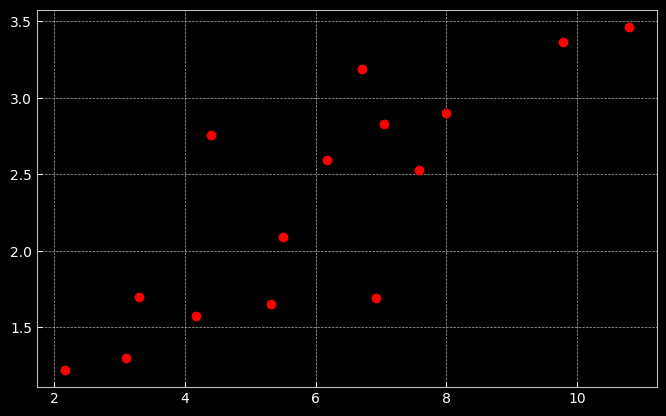

In [13]:
# plot the training data
plt.plot(x_train, y_train, 'ro', label='Original data')

In [20]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [21]:
# check the parameters of the linear model
list(model.parameters())

[Parameter containing:
 tensor([[-0.6108]], requires_grad=True), Parameter containing:
 tensor([-0.8907], requires_grad=True)]

In [11]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [5/60], Loss: 0.2047
Epoch [10/60], Loss: 0.2044
Epoch [15/60], Loss: 0.2042
Epoch [20/60], Loss: 0.2041
Epoch [25/60], Loss: 0.2040
Epoch [30/60], Loss: 0.2039
Epoch [35/60], Loss: 0.2038
Epoch [40/60], Loss: 0.2037
Epoch [45/60], Loss: 0.2036
Epoch [50/60], Loss: 0.2035
Epoch [55/60], Loss: 0.2034
Epoch [60/60], Loss: 0.2033


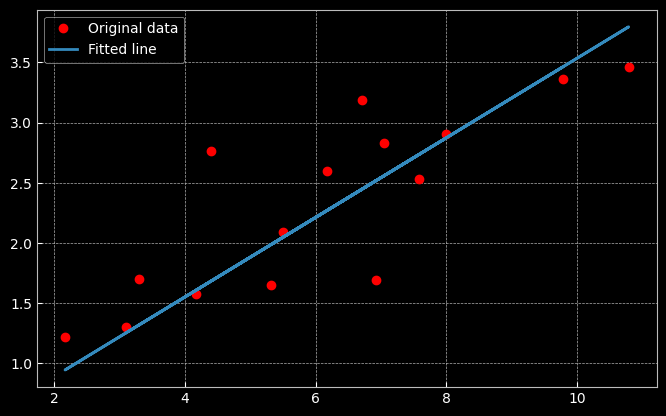

In [10]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()